In [ ]:
# https://wikidocs.net/book/922 파이썬 문제 풀어보기

# 15. 데이터 프레임
- 행열과동일한 구조
- 매트릭스와 다른 점은 컬럼이 다른 데이터 유형이 가능하다

In [4]:
?data.frame

In [9]:
v1 = c('홍길동','이순신', '임꺽정')
v2 = c(80,90, 30)
v3 = c(70,80, 50)
v4 = c(50,40, 20)
df = data.frame(v1,v2,v3,v4, row.names = c('a','b','c')) 
colnames(df) = c('이름', '국어','영어','수학')
df

,이름,국어,영어,수학
a,홍길동,80,70,50
b,이순신,90,80,40
c,임꺽정,30,50,20


In [10]:
id <- c('F1', 'F2', 'F3','F4','F5')
name <- c('김가수', '박인호', '고소미','홍길동','이순신')
age <- c(32 , 28 , 22, 30, 40 )
isMarried <- c(TRUE , TRUE , FALSE, FALSE, TRUE)
df1 = data.frame(id, name, age, isMarried)
df1

id,name,age,isMarried
F1,김가수,32,TRUE
F2,박인호,28,TRUE
F3,고소미,22,FALSE
F4,홍길동,30,FALSE
F5,이순신,40,TRUE


## 기본 함수

In [11]:
dim(df)

[1] 3 4

In [12]:
nrow(df)

[1] 3

In [13]:
ncol(df)

[1] 4

In [14]:
t(df) #트랜스포즈 행열 바꿈

,a,b,c
이름,홍길동,이순신,임꺽정
국어,80,90,30
영어,70,80,50
수학,50,40,20


In [15]:
str(df)

'data.frame':	3 obs. of  4 variables:
 $ 이름: Factor w/ 3 levels "이순신","임꺽정",..: 3 1 2
 $ 국어: num  80 90 30
 $ 영어: num  70 80 50
 $ 수학: num  50 40 20


In [16]:
length(df)

[1] 4

In [17]:
row.names(df)

[1] "a" "b" "c"

In [18]:
colnames(df)

[1] "이름" "국어" "영어" "수학"

## 인덱싱
- 컬럼 : ['컬럼명'] , [숫자 인덱스]
- [ 행 , 열 ]

In [19]:
df['국어'] # 데이터프레임으로 나옴

,국어
a,80
b,90
c,30


In [20]:
df$국어 # 벡터로 나옴

[1] 80 90 30

In [21]:
df[ c('국어','영어')] # pandas : df[ ['국어','영어']]

,국어,영어
a,80,70
b,90,80
c,30,50


In [23]:
df[1]

,이름,국어,영어,수학
a,홍길동,80,70,50


In [24]:
df[1,]

,이름,국어,영어,수학
a,홍길동,80,70,50


In [26]:
df['a',]

,이름,국어,영어,수학
a,홍길동,80,70,50


In [27]:
df[1,1]

[1] 홍길동
Levels: 이순신 임꺽정 홍길동

In [28]:
df['a','국어']

[1] 80

In [29]:
df[c('a','c'),]

,이름,국어,영어,수학
a,홍길동,80,70,50
c,임꺽정,30,50,20


In [30]:
df[c(1,3)]

,이름,영어
a,홍길동,70
b,이순신,80
c,임꺽정,50


In [31]:
df[1:2,]

,이름,국어,영어,수학
a,홍길동,80,70,50
b,이순신,90,80,40


In [32]:
df[2:3,3:4]

,영어,수학
b,80,40
c,50,20


In [38]:
### 마지막컬럼 앞에 모든 컬럼 선택
df[-length(df)]
df[-ncol(df)]

,이름,국어,영어
a,홍길동,80,70
b,이순신,90,80
c,임꺽정,30,50


,이름,국어,영어
a,홍길동,80,70
b,이순신,90,80
c,임꺽정,30,50


## 연산
- 요소별
- broadcasting

### 산술, 관계, 논리

In [12]:
v1 = c('홍길동','이순신', '임꺽정')
v2 = c(80,90, 30)
v3 = c(70,80, 50)
v4 = c(50,40, 20)
df = data.frame( v2,v3,v4, row.names = v1)
colnames(df) = c('kor','eng','math')
df

,kor,eng,math
홍길동,80,70,50
이순신,90,80,40
임꺽정,30,50,20


In [48]:
df + df

,kor,eng,math
홍길동,160,140,100
이순신,180,160,80
임꺽정,60,100,40


In [49]:
df + 2

,kor,eng,math
홍길동,82,72,52
이순신,92,82,42
임꺽정,32,52,22


In [50]:
df + c(1,2,3)

,kor,eng,math
홍길동,81,71,51
이순신,92,82,42
임꺽정,33,53,23


### boolean index :  R 행, 열 단위 둘 다 가능 / python pandas 행 단위
                         

In [51]:
df[c(T,T,F)]

,kor,eng
홍길동,80,70
이순신,90,80
임꺽정,30,50


In [52]:
df[c(T,T,F),]

,kor,eng,math
홍길동,80,70,50
이순신,90,80,40


In [54]:
# df['kor']
df$kor > 60
df[df$kor > 60,]  # 콤마 넣어야 함

[1]  TRUE  TRUE FALSE

,kor,eng,math
홍길동,80,70,50
이순신,90,80,40


In [55]:
df$kor == 80 | df$kor == 30

[1]  TRUE FALSE  TRUE

In [56]:
df[df$math > 20 & df$math < 100,]

,kor,eng,math
홍길동,80,70,50
이순신,90,80,40


In [ ]:
?subset

In [13]:
subset(df, kor >= 80, c('kor','eng'))

,kor,eng
홍길동,80,70
이순신,90,80


In [14]:
# 영어점수가 70 또는 50인 행을 선택하시오
subset(df, eng == 70 | eng == 50)

,kor,eng,math
홍길동,80,70,50
임꺽정,30,50,20


### Python pandas query
---------------------------------------

In [ ]:
df[ df['c1'] >= 4]
df.query('c1 >=4')

In [ ]:
df[df['c1'] ==4 | df['c1'] == 7]
df.query('c1' == 4 or 'c1' == 7)

In [ ]:
df[df['c1'] >=4 & df['c1'] <= 7]
df.query('c1' >= 4 and 'c1' <= 7)

In [ ]:
n=4
df[ df['c1'] >=n ]
df.query( 'c1>=n')

In [ ]:
n=4
# df[ df['c1'] >=n ]
df.query( 'c1>=@n')

________________________________________________________________________

## SQL을 이용한 데이터 프레임 사용

In [69]:
install.packages('sqldf')

also installing the dependencies 'glue', 'cli', 'vctrs', 'rlang', 'cachem', 'blob', 'memoise', 'Rcpp', 'RSQLite'




  There are binary versions available but the source versions are later:
        binary  source needs_compilation
glue     1.4.2   1.6.2              TRUE
cli      2.5.0   3.2.0              TRUE
vctrs    0.3.8   0.4.1              TRUE
rlang   0.4.11   1.0.2              TRUE
cachem   1.0.4   1.0.6              TRUE
blob     1.2.1   1.2.3             FALSE
memoise  2.0.0   2.0.1             FALSE
Rcpp     1.0.6 1.0.8.3              TRUE
RSQLite  2.2.7  2.2.12              TRUE

package 'sqldf' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\tmp\RtmpCieNaY\downloaded_packages


installing the source packages 'glue', 'cli', 'vctrs', 'rlang', 'cachem', 'blob', 'memoise', 'Rcpp', 'RSQLite'

Warning message in install.packages("sqldf"):
"installation of package 'glue' had non-zero exit status"Warning message in install.packages("sqldf"):
"installation of package 'rlang' had non-zero exit status"Warning message in install.packages("sqldf"):
"installation of package 'Rcpp' had non-zero exit status"Warning message in install.packages("sqldf"):
"installation of package 'cli' had non-zero exit status"Warning message in install.packages("sqldf"):
"installation of package 'cachem' had non-zero exit status"Warning message in install.packages("sqldf"):
"installation of package 'vctrs' had non-zero exit status"Warning message in install.packages("sqldf"):
"installation of package 'memoise' had non-zero exit status"Warning message in install.packages("sqldf"):
"installation of package 'blob' had non-zero exit status"Warning message in install.packages("sqldf"):
"installatio

In [1]:
require(sqldf)

Loading required package: sqldf
Warning message:
"package 'sqldf' was built under R version 3.6.3"Loading required package: gsubfn
Warning message:
"package 'gsubfn' was built under R version 3.6.3"Loading required package: proto
Warning message:
"package 'proto' was built under R version 3.6.3"

In [65]:
id <- c('F1', 'F2', 'F3','F4','F5')
name <- c('김가수', '박인호', '고소미','홍길동','이순신')
age <- c(32 , 28 , 22, 30, 40 )
isMarried <- c(TRUE , TRUE , FALSE, FALSE, TRUE)
df1 = data.frame( id,name,age, isMarried)
print(df1)
df1

  id   name age isMarried
1 F1 김가수  32      TRUE
2 F2 박인호  28      TRUE
3 F3 고소미  22     FALSE
4 F4 홍길동  30     FALSE
5 F5 이순신  40      TRUE


id,name,age,isMarried
F1,김가수,32,TRUE
F2,박인호,28,TRUE
F3,고소미,22,FALSE
F4,홍길동,30,FALSE
F5,이순신,40,TRUE


In [67]:
?sqldf

In [2]:
sqldf("select * from df1")

ERROR: Error in sqldf("select * from df1"): 함수 "sqldf"를 찾을 수 없습니다


In [ ]:
# 1. 나이가 30 이상인 데이터를 선택하시오
sqldf("select * from df1 where age>=30")

In [ ]:
# 2. 나이순으로 정렬하세요
sqldf("select * from df1 order by age desc")

In [ ]:
# 3. 이름에 '김' 글자가 있는 데이터를 선택하시오
sqldf("select * from df1 where name LIKE '%김%'")

In [ ]:
# 4. 나이가 30이상 50이하인 데이터의 이름과 나이를 선택하시오
sqldf("select name, age from df1 where age >= 30 and age <=50")

### dplyr 패키지 이용

In [6]:
install.packages("dplyr")

also installing the dependencies 'cli', 'glue', 'lifecycle', 'rlang', 'tibble', 'tidyselect', 'vctrs', 'pillar'




  There are binary versions available but the source versions are later:
           binary source needs_compilation
cli         2.5.0  3.2.0              TRUE
glue        1.4.2  1.6.2              TRUE
lifecycle   1.0.0  1.0.1             FALSE
rlang      0.4.11  1.0.2              TRUE
tibble      3.1.1  3.1.6              TRUE
tidyselect  1.1.1  1.1.2              TRUE
vctrs       0.3.8  0.4.1              TRUE
pillar      1.6.0  1.7.0             FALSE
dplyr       1.0.6  1.0.8              TRUE



installing the source packages 'cli', 'glue', 'lifecycle', 'rlang', 'tibble', 'tidyselect', 'vctrs', 'pillar', 'dplyr'

Warning message in install.packages("dplyr"):
"installation of package 'glue' had non-zero exit status"Warning message in install.packages("dplyr"):
"installation of package 'rlang' had non-zero exit status"Warning message in install.packages("dplyr"):
"installation of package 'cli' had non-zero exit status"Warning message in install.packages("dplyr"):
"installation of package 'lifecycle' had non-zero exit status"Warning message in install.packages("dplyr"):
"installation of package 'vctrs' had non-zero exit status"Warning message in install.packages("dplyr"):
"installation of package 'tidyselect' had non-zero exit status"Warning message in install.packages("dplyr"):
"installation of package 'pillar' had non-zero exit status"Warning message in install.packages("dplyr"):
"installation of package 'tibble' had non-zero exit status"Warning message in install.packages("dpl

In [5]:
library("dplyr")

ERROR: Error in library("dplyr"): there is no package called 'dplyr'


In [ ]:
?filtter

In [ ]:
filtter(df1, age >= 30) 
# subset(df1, age >= 30)

In [ ]:
filter(df1, age ==2 | age == 30)

In [ ]:
?select

In [ ]:
select(df1, name, age)

In [ ]:
df1 %>% filter ( age ==22 | age == 30) %>% select(name, age)

In [ ]:
# mutate(df1, age = age*2) %>% select(name, aged)
mutate(df1, age = age*2)

In [ ]:
# sql로 했을 때
sqld("select name, age, age*2 as aged from df1")

In [ ]:
?arrange

In [ ]:
arrange( df1, age)

In [ ]:
?slice

In [ ]:
slice(df1, 2:4)

## 삭제

In [40]:
df[-1]

,eng,math
홍길동,70,50
이순신,80,40
임꺽정,50,20


In [41]:
df[-c(1,2)]

,math
홍길동,50
이순신,40
임꺽정,20


In [42]:
df[-1,]

,kor,eng,math
이순신,90,80,40
임꺽정,30,50,20


## 수정

In [43]:
df$kor = c(1,2,3)
df

,kor,eng,math
홍길동,1,70,50
이순신,2,80,40
임꺽정,3,50,20


In [45]:
df['kor'] = c(11,22,33)
df

,kor,eng,math
홍길동,11,70,50
이순신,22,80,40
임꺽정,33,50,20


## 추가

In [17]:
df['test'] = c(11,22,33) # 컬럼 있으면 수정 없으면 추가
# df[1] df[,1] df[,'kor']
df

,kor,eng,math,test
홍길동,11,70,50,11
이순신,22,80,40,22
임꺽정,33,50,20,33


In [18]:
df['sum'] = df$kor + df$eng 
df

,kor,eng,math,test,sum
홍길동,11,70,50,11,81
이순신,22,80,40,22,102
임꺽정,33,50,20,33,83


In [19]:
df['이황',]  = c(1,2,3) # 있으면 수정 없으면 추가

ERROR: Error in `[<-.data.frame`(`*tmp*`, "이황", , value = c(1, 2, 3)): replacement has 3 items, need 5


## 정렬

In [48]:
v1 = c('홍길동','이순신', '임꺽정')
v2 = c(80,90, 30)
v3 = c(70,80, 50)
v4 = c(50,40, 20)
df = data.frame( v2,v3,v4, row.names = v1)
colnames(df) = c('kor','eng','math')
df

,kor,eng,math
홍길동,80,70,50
이순신,90,80,40
임꺽정,30,50,20


In [49]:
sort(df$kor)
order(df$kor)

[1] 30 80 90

[1] 3 1 2

In [50]:
df[ order( df$kor),]
df[ order( df$kor,decreasing=T),]

,kor,eng,math
임꺽정,30,50,20
홍길동,80,70,50
이순신,90,80,40


,kor,eng,math
이순신,90,80,40
홍길동,80,70,50
임꺽정,30,50,20


## 다중정렬

In [57]:
library(dplyr)

ERROR: Error in library(dplyr): there is no package called 'dplyr'


In [59]:
df['이이',] = c(30,20,70)

ERROR: Error in `[<-.data.frame`(`*tmp*`, "이이", , value = c(30, 20, 70)): replacement has 3 items, need 4


In [58]:
arrange(df, kor)

ERROR: Error in arrange(df, kor): 함수 "arrange"를 찾을 수 없습니다


In [ ]:
arrange(df, kor, eng)

In [60]:
arrange(df, desc(kor))

ERROR: Error in arrange(df, desc(kor)): 함수 "arrange"를 찾을 수 없습니다


In [26]:
sum(df$kor)

[1] 240

In [28]:
sum(df)

[1] 882

In [29]:
rowSums(df)

홍길동 이순신 임꺽정 
   292    334    256

In [30]:
rowSums(df)['홍길동']

홍길동 
   292

In [31]:
colSums(df)

kor  eng math test  sum 
 240  200  110   66  266

In [36]:
fn = function(v)
{
    cat(v,fill=T)
    cat('===========',fill=T)
    return (sum(v))
}


In [37]:
apply(df, 1, fn)

80 70 50 11 81
90 80 40 22 102
70 50 20 33 83


홍길동 이순신 임꺽정 
   292    334    256

In [38]:
apply(df, 2, function(v) sum(v))

kor  eng math test  sum 
 240  200  110   66  266

In [51]:
# 국어, 영어, 수학 평균이 70점 이상이면 '합격' 아니면 ' 불합격'으로 표시되는 결과 컬럼을 추가하시오
df['결과'] = apply(df,1, function(v) ifelse(mean(v)>=70,'합격','불합격') )
df

,kor,eng,math,결과
홍길동,80,70,50,불합격
이순신,90,80,40,합격
임꺽정,30,50,20,불합격


In [66]:
v1 = c('홍길동','이순신', '임꺽정')
v2 = c(80,90, 30)
v3 = c(70,80, 50)
v4 = c(50,40, 20)
df = data.frame( v2,v3,v4, row.names = v1)
colnames(df) = c('kor','eng','math')
df

,kor,eng,math
홍길동,80,70,50
이순신,90,80,40
임꺽정,30,50,20


In [67]:
mean( as.matrix(df))

[1] 56.66667

In [72]:
rowMeans(df)

홍길동   이순신   임꺽정 
66.66667 70.00000 33.33333

In [71]:
colMeans(df) %>% round(2)

ERROR: Error in colMeans(df) %>% round(2): 함수 "%>%"를 찾을 수 없습니다


In [73]:
max(df)

[1] 90

In [75]:
apply(df, 1, max)

홍길동 이순신 임꺽정 
    80     90     50

In [76]:
apply(df, 2, max)

kor  eng math 
  90   80   50

In [77]:
median(as.matrix(df))

[1] 50

In [78]:
apply(df, 1, median)

홍길동 이순신 임꺽정 
    70     80     30

In [79]:
quantile( as.matrix(df), c(0.25, 0.5, 0.75))

25% 50% 75% 
 40  50  80

In [80]:
sd( as.matrix(df))

[1] 24.4949

In [ ]:
# dplyr의 함수 
?top_n

In [82]:
top_n(df, 2, wt = eng)

ERROR: Error in top_n(df, 2, wt = eng): 함수 "top_n"를 찾을 수 없습니다


In [ ]:
top_n(df, -2, wt = eng)

In [ ]:
head(df, 2)

### Python
--------------------------------------

In [ ]:
data =  {'eng':[10,30,50,70],
         'kor':[20,40,60,80],
         'math':[90,50,20,70]}
df = pd.DataFrame(data, index=['a','b','c','d'] )
df

In [ ]:
df.loc['b','kor'] = 60

In [ ]:
# 국어점수가 가장 높은 2개의 값을 구하시오
df.nlargest(2, 'kor')

In [ ]:
df.nlargest(2, 'kor'm keep="last")

In [ ]:
df.nlargest(2, 'kor'm keep="all")

-----------------------------------------------

# 데이터프레임 연습

In [ ]:
library(magrittr)
library(dplyr)

In [ ]:
?read.csv

In [119]:
birthDF = read.table('C:/R/data/births.txt', sep=",", row.names = 'V1', col.names=c('V1','남아수','여아수'))
birthDF

,남아수,여아수
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
1885,133055,107800
1886,144535,110784
1887,145982,101414
1888,178627,120853
1889,178366,110584


In [123]:
# 1. 남아수가 가장 높은 년도 남아수를 구하시오
m = max(birthDF['남아수'])
birthDF[birthDF$남아수 == m,]['남아수']

,남아수
1957,2044160


In [124]:
subset(birthDF, 남아수 == m )['남아수']

,남아수
1957,2044160


In [128]:
# 2. 2000년도 이후 데이터를 구하시오
birthDF[row.names(birthDF) >= 2000,]

,남아수,여아수
2000,1814601,1962406
2001,1799049,1941251
2002,1795206,1939815
2003,1825359,1973434
2004,1834145,1982794
2005,1845379,1994841
2006,1898463,2052377
2007,1919408,2072139
2008,1887234,2036289
2009,1832925,1979303


In [126]:
row.names(birthDF) = as.integer(row.names(birthDF))

In [112]:
# 3. 남아수, 여아수 평균을 구하시오
mean(birthDF$남아수)
mean(birthDF$여아수)

[1] 1225776

[1] 1245399

In [130]:
mean(as.matrix(birthDF['남아수']))
mean(as.matrix(birthDF['여아수']))

[1] 1225776

[1] 1245399

In [113]:
# 4. 남아수가 가장 높은 top5를 구하시오
top_n(df, 5, wt = 남아수)

ERROR: Error in top_n(df, 5, wt = 남아수): 함수 "top_n"를 찾을 수 없습니다


In [149]:
# 5. 1980년대 1990년대 2000년대 남아 영아 평균을 구하시오

In [146]:
mean(as.matrix(birthDF[row.names(birthDF)>=1980 & row.names(birthDF) < 1990,]['남아수']))
mean(as.matrix(birthDF[row.names(birthDF)>=1980 & row.names(birthDF) < 1990,]['여아수']))

[1] 1716865

[1] 1844977

In [147]:
mean(as.matrix(birthDF[row.names(birthDF)>=1990 & row.names(birthDF) < 2000,]['남아수']))
mean(as.matrix(birthDF[row.names(birthDF)>=1990 & row.names(birthDF) < 2000,]['여아수']))

[1] 1799743

[1] 1946934

In [148]:
mean(as.matrix(birthDF[row.names(birthDF)>=2000 ,]['남아수']))
mean(as.matrix(birthDF[row.names(birthDF)>=2000,]['여아수']))

[1] 1831501

[1] 1978478

## 과제 4

In [164]:
data = read.csv('C:/R/data/crime_in_Seoul.csv', fileEncoding = 'utf-8') # 한글csv 파일 읽어올 때 utf-8 ,cp949(데이터 수 클 때)
data

관서명,살인.발생,살인.검거,강도.발생,강도.검거,강간.발생,강간.검거,절도.발생,절도.검거,폭력.발생,폭력.검거
중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
남대문서,1,0,6,4,65,46,"1,153",382,869,794
서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861
용산서,5,5,14,14,194,173,"1,557",587,"2,050","1,704"
성북서,2,2,2,1,86,71,953,409,"1,194","1,015"
동대문서,5,5,13,13,173,146,"1,981",814,"2,548","2,227"
마포서,8,8,14,10,294,247,"2,555",813,"2,983","2,519"
영등포서,14,12,22,20,295,183,"2,964",978,"3,572","2,961"


In [462]:
str(data)

'data.frame':	31 obs. of  18 variables:
 $ 관서명      : Factor w/ 31 levels "강남서","강동서",..: 30 27 9 16 31 25 20 12 14 24 ...
 $ 살인.발생   : int  2 3 1 2 3 5 2 5 8 14 ...
 $ 살인.검거   : int  2 3 0 2 2 5 2 5 8 12 ...
 $ 강도.발생   : int  3 6 6 5 5 14 2 13 14 22 ...
 $ 강도.검거   : int  2 5 4 4 4 14 1 13 10 20 ...
 $ 강간.발생   : int  105 115 65 154 96 194 86 173 294 295 ...
 $ 강간.검거   : int  65 98 46 124 63 173 71 146 247 183 ...
 $ 절도.발생   : int  1395 1070 1153 1812 1114 1557 953 1981 2555 2964 ...
 $ 절도.검거   : int  477 413 382 738 424 587 409 814 813 978 ...
 $ 폭력.발생   : int  1355 1278 869 2056 1015 2050 1194 2548 2983 3572 ...
 $ 폭력.검거   : int  1170 1070 794 1711 861 1704 1015 2227 2519 2961 ...
 $ 절도검거율  : num  0.25 0.28 0.25 0.29 0.28 0.27 0.3 0.29 0.24 0.25 ...
 $ 살인차이    : int [1:31, 1] 0 0 1 0 1 0 0 0 0 2 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr "살인.발생"
 $ 강도차이    : int [1:31, 1] 1 1 2 1 1 0 1 0 4 2 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ :

In [463]:
data$절도.발생 =  gsub(",", "", data$절도.발생)
data$절도.검거 =  gsub(",", "", data$절도.검거)
data$폭력.발생 =  gsub(",", "", data$폭력.발생)
data$폭력.검거 =  gsub(",", "", data$폭력.검거)
head(data)

관서명,살인.발생,살인.검거,강도.발생,강도.검거,강간.발생,강간.검거,절도.발생,절도.검거,폭력.발생,폭력.검거,절도검거율,살인차이,강도차이,강간차이,절도차이,살인발생결과,살인폭력평균
중부서,2,2,3,2,105,65,1395,477,1355,1170,0.25,0,1,40,NA,적음,1355
종로서,3,3,6,5,115,98,1070,413,1278,1070,0.28,0,1,17,NA,적음,1278
남대문서,1,0,6,4,65,46,1153,382,869,794,0.25,1,2,19,NA,적음,869
서대문서,2,2,5,4,154,124,1812,738,2056,1711,0.29,0,1,30,NA,적음,2056
혜화서,3,2,5,4,96,63,1114,424,1015,861,0.28,1,1,33,NA,적음,1015
용산서,5,5,14,14,194,173,1557,587,2050,1704,0.27,0,0,21,NA,보통,2050


In [ ]:
#pandas
pd.read.csv(...., thousands=','...) # 컴마 없이 

In [166]:
# 1. 살인발생이 가장높은 관서명, 살인발생,살인검거를 출력하시요
max(data$살인.발생)
data[data$살인.발생 == max(data$살인.발생), c('관서명','살인.발생','살인.검거') ]

[1] 14

,관서명,살인.발생,살인.검거
10,영등포서,14,12


In [461]:
# 2. 관서별 절도발생,절도검거에 대한 바차트를 그리시요
library('')

ERROR: Error in barplot.default(data$관서명, data$절도.검거): 'height' must be a vector or a matrix


In [443]:
# 3. 절도검거율 컬럼을 추가 하시요
data['절도검거율'] = round(as.numeric(data$'절도.검거') /as.numeric(data$'절도.발생'),2)
data

관서명,살인.발생,살인.검거,강도.발생,강도.검거,강간.발생,강간.검거,절도.발생,절도.검거,폭력.발생,폭력.검거,절도검거율,살인차이,강도차이,강간차이,절도차이,살인발생결과,살인폭력평균
중부서,2,2,3,2,105,65,1395,477,1355,1170,0.25,0,1,40,NA,적음,1355
종로서,3,3,6,5,115,98,1070,413,1278,1070,0.28,0,1,17,NA,적음,1278
남대문서,1,0,6,4,65,46,1153,382,869,794,0.25,1,2,19,NA,적음,869
서대문서,2,2,5,4,154,124,1812,738,2056,1711,0.29,0,1,30,NA,적음,2056
혜화서,3,2,5,4,96,63,1114,424,1015,861,0.28,1,1,33,NA,적음,1015
용산서,5,5,14,14,194,173,1557,587,2050,1704,0.27,0,0,21,NA,보통,2050
성북서,2,2,2,1,86,71,953,409,1194,1015,0.30,0,1,15,NA,적음,1194
동대문서,5,5,13,13,173,146,1981,814,2548,2227,0.29,0,0,27,NA,보통,2548
마포서,8,8,14,10,294,247,2555,813,2983,2519,0.24,0,4,47,NA,많음,2983
영등포서,14,12,22,20,295,183,2964,978,3572,2961,0.25,2,2,112,NA,많음,3572


In [ ]:
# 4. 살인 발생이 가장 높은 top5 관서명 살인발생 살인 검거를 구하시요
top5 = top_n(df, 5, wt = 살인.발생)
data[data$살인발생 == top5 ,c('관서명','살인.발생','살인.검거')]

In [206]:
# 5. 살인 발생이 7건이상이면 '많음' 4~5건 '보통' 나머지 '적음'으로 표시되는 정도 컬럼을 추가하시요
fn = function(v) {
    if(v >=7){ 
       return('많음') 
    }else if( v >=4 ){
        return ('보통')
    }else {
        return ('적음')
    }
        }

In [308]:
for (i in 1:nrow(data)){
    data$'살인발생결과'[i] = fn(data$'살인.발생'[i])
}
# data['살인발생결과'] = apply(data[살인.발생], 1, fn)
data

관서명,살인.발생,살인.검거,강도.발생,강도.검거,강간.발생,강간.검거,절도.발생,절도.검거,폭력.발생,폭력.검거,절도검거율,살인차이,강도차이,강간차이,절도차이,살인발생결과
중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",2.00,0,1,40,NA,적음
종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",4.50,0,1,17,NA,적음
남대문서,1,0,6,4,65,46,"1,153",382,869,794,1.40,1,2,19,NA,적음
서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",1.67,0,1,30,NA,적음
혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,2.75,1,1,33,NA,적음
용산서,5,5,14,14,194,173,"1,557",587,"2,050","1,704",1.56,0,0,21,NA,보통
성북서,2,2,2,1,86,71,953,409,"1,194","1,015",0.26,0,1,15,NA,적음
동대문서,5,5,13,13,173,146,"1,981",814,"2,548","2,227",1.60,0,0,27,NA,보통
마포서,8,8,14,10,294,247,"2,555",813,"2,983","2,519",1.00,0,4,47,NA,많음
영등포서,14,12,22,20,295,183,"2,964",978,"3,572","2,961",1.20,2,2,112,NA,많음


In [419]:
# 6. 살인 발생과 폭력 발생의 평균(살인평균폭격)순으로 정렬 하시요. 관서명 살인폭력 평균
data['살인폭력평균'] = 0
for (i in 1:nrow(data)){
     data$'살인폭력평균'[i] = (as.numeric(data$'살인.발생'[i]) + as.numeric(data$'폭력.발생'[i])) / 2
}
data

관서명,살인.발생,살인.검거,강도.발생,강도.검거,강간.발생,강간.검거,절도.발생,절도.검거,폭력.발생,폭력.검거,절도검거율,살인차이,강도차이,강간차이,절도차이,살인발생결과,살인폭력평균
중부서,2,2,3,2,105,65,1395,477,1355,1170,2.00,0,1,40,NA,적음,1355
종로서,3,3,6,5,115,98,1070,413,1278,1070,4.50,0,1,17,NA,적음,1278
남대문서,1,0,6,4,65,46,1153,382,869,794,1.40,1,2,19,NA,적음,869
서대문서,2,2,5,4,154,124,1812,738,2056,1711,1.67,0,1,30,NA,적음,2056
혜화서,3,2,5,4,96,63,1114,424,1015,861,2.75,1,1,33,NA,적음,1015
용산서,5,5,14,14,194,173,1557,587,2050,1704,1.56,0,0,21,NA,보통,2050
성북서,2,2,2,1,86,71,953,409,1194,1015,0.26,0,1,15,NA,적음,1194
동대문서,5,5,13,13,173,146,1981,814,2548,2227,1.60,0,0,27,NA,보통,2548
마포서,8,8,14,10,294,247,2555,813,2983,2519,1.00,0,4,47,NA,많음,2983
영등포서,14,12,22,20,295,183,2964,978,3572,2961,1.20,2,2,112,NA,많음,3572


In [435]:
data[order(data$살인폭력평균),c('관서명','살인폭력평균')]

,관서명,살인폭력평균
28,방배서,547
3,남대문서,869
5,혜화서,1015
22,종암서,1015
14,서부서,1192
7,성북서,1194
2,종로서,1278
1,중부서,1355
29,은평서,1461
30,도봉서,1487


In [248]:
# 7. 모든컬럼 발생과 검거의 차이가 가장높은 관서명과 수를 구하시요
data['살인차이'] = as.matrix(data['살인.발생']) - as.matrix(data['살인.검거'])
data[data['살인차이'] == max(data['살인차이']),c('관서명','살인차이')]

,관서명,살인차이
24,서초서,3
31,수서서,3


In [249]:
data['강도차이'] = as.matrix(data['강도.발생']) - as.matrix(data['강도.검거'])
data[data['강도차이'] == max(data['강도차이']),c('관서명','강도차이')]

,관서명,강도차이
9,마포서,4
12,동작서,4
23,구로서,4


In [250]:
data['강간차이'] = as.matrix(data['강간.발생']) - as.matrix(data['강간.검거'])
data[data['강간차이'] == max(data['강간차이']),c('관서명','강간차이')]

,관서명,강간차이
12,동작서,146


In [445]:
data['절도차이'] = as.matrix(data['절도.발생']) - as.matrix(data['절도.검거'])
data[data['절도차이'] == max(data['절도차이']),c('관서명','절도차이')]

ERROR: Error in as.matrix(data["절도.발생"]) - as.matrix(data["절도.검거"]): 이항연산자에 수치가 아닌 인수입니다


In [432]:
data['폭력차이'] = as.matrix(data['폭력.발생']) - as.matrix(data['폭력.검거'])
data[data['폭력차이'] == max(data['폭력차이']),c('관서명','폭력차이')]

ERROR: Error in as.matrix(data["폭력.발생"]) - as.matrix(data["폭력.검거"]): 이항연산자에 수치가 아닌 인수입니다


In [464]:
# 다른방법
data[ seq(1, ncol(data), 2)]

관서명,살인.검거,강도.검거,강간.검거,절도.검거,폭력.검거,살인차이,강간차이,살인발생결과
중부서,2,2,65,477,1170,0,40,적음
종로서,3,5,98,413,1070,0,17,적음
남대문서,0,4,46,382,794,1,19,적음
서대문서,2,4,124,738,1711,0,30,적음
혜화서,2,4,63,424,861,1,33,적음
용산서,5,14,173,587,1704,0,21,보통
성북서,2,1,71,409,1015,0,15,적음
동대문서,5,13,146,814,2227,0,27,보통
마포서,8,10,247,813,2519,0,47,많음
영등포서,12,20,183,978,2961,2,112,많음


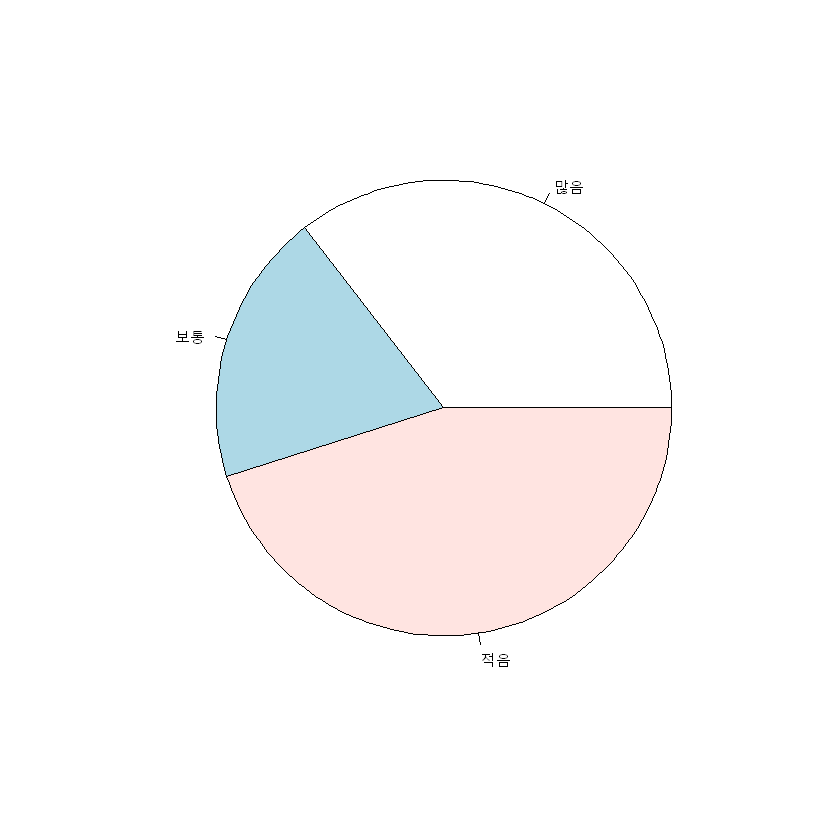

In [367]:
# 8. (5번에서 만든)정도의 비율을 파이차트로 그리시요
pie(table(data$'살인발생결과'))

In [231]:
# 9. 관서명에 '강' 글자가 있는 데이터를 구하시요( 관서명 살인발생 살인 검거 폭력발생 폭력검거)
data[grep("강", data$관서명), c('관서명','살인.발생','살인.검거','폭력.발생','폭력.검거')]

,관서명,살인.발생,살인.검거,폭력.발생,폭력.검거
15,강북서,7,8,"2,649","2,348"
18,강남서,3,3,"2,465","2,146"
20,강서서,7,8,"3,207","2,718"
21,강동서,4,3,"2,712","2,248"


In [450]:
# 10. 절도검거율이 평균 보다 높은 관서명, 절도발생, 절도검거, 절도 검거율
data[data$절도검거율 > mean(data$절도검거율),c('관서명','절도.발생','절도.검거','절도검거율')]

,관서명,절도.발생,절도.검거,절도검거율
4,서대문서,1812,738,0.29
7,성북서,953,409,0.30
8,동대문서,1981,814,0.29
13,광진서,3026,1277,0.30
15,강북서,1434,618,0.30
16,금천서,1567,888,0.36
18,강남서,2411,984,0.29
20,강서서,2096,1260,0.38
22,종암서,832,332,0.29
24,서초서,1982,905,0.31


In [459]:
# 11. 생성한 dataframe과 기존의 dataframe을 분리해서 각각의 변수로 받기
new_frame = data[12:length(data)]
new_frame
old_frame = data[1:11]
old_frame



절도검거율,살인차이,강도차이,강간차이,절도차이,살인발생결과,살인폭력평균
0.25,0,1,40,NA,적음,1355
0.28,0,1,17,NA,적음,1278
0.25,1,2,19,NA,적음,869
0.29,0,1,30,NA,적음,2056
0.28,1,1,33,NA,적음,1015
0.27,0,0,21,NA,보통,2050
0.30,0,1,15,NA,적음,1194
0.29,0,0,27,NA,보통,2548
0.24,0,4,47,NA,많음,2983
0.25,2,2,112,NA,많음,3572


관서명,살인.발생,살인.검거,강도.발생,강도.검거,강간.발생,강간.검거,절도.발생,절도.검거,폭력.발생,폭력.검거
중부서,2,2,3,2,105,65,1395,477,1355,1170
종로서,3,3,6,5,115,98,1070,413,1278,1070
남대문서,1,0,6,4,65,46,1153,382,869,794
서대문서,2,2,5,4,154,124,1812,738,2056,1711
혜화서,3,2,5,4,96,63,1114,424,1015,861
용산서,5,5,14,14,194,173,1557,587,2050,1704
성북서,2,2,2,1,86,71,953,409,1194,1015
동대문서,5,5,13,13,173,146,1981,814,2548,2227
마포서,8,8,14,10,294,247,2555,813,2983,2519
영등포서,14,12,22,20,295,183,2964,978,3572,2961


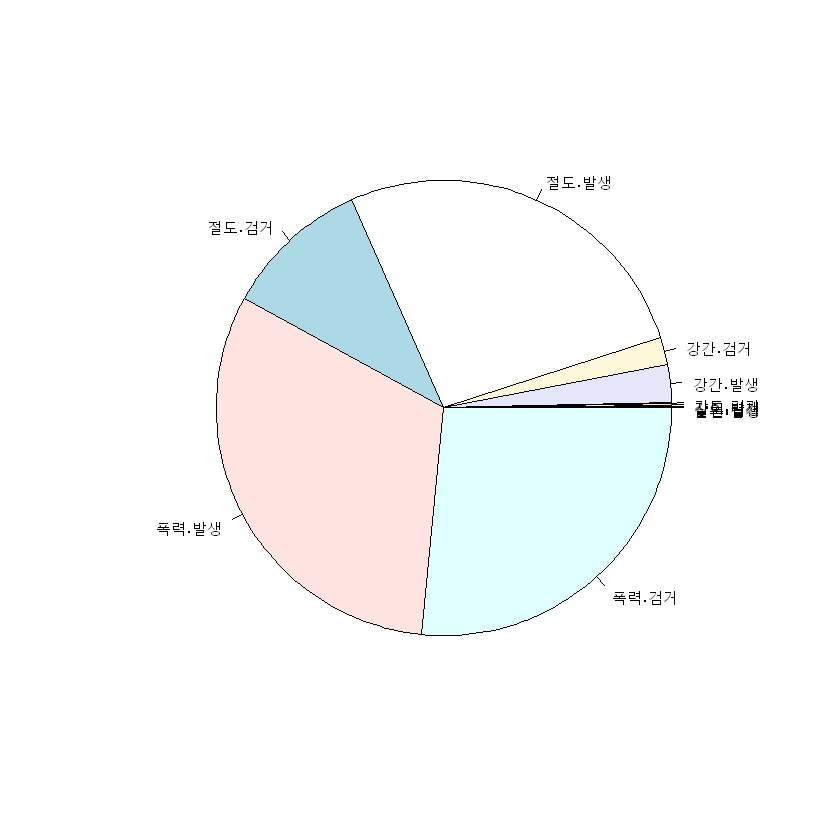

In [455]:
#12
a = subset(data, select=c("살인.발생", "살인.검거", 
                      '강도.발생', '강도.검거', 
                      '강간.발생', '강간.검거', 
                      '절도.발생', '절도.검거', 
                      '폭력.발생', '폭력.검거' ))
data$살인.발생 = as.integer(data$살인.발생)
data$살인.검거 = as.integer(data$살인.검거)
data$강도.발생 = as.integer(data$강도.발생)
data$강도.검거 = as.integer(data$강도.검거)
data$강간.발생 = as.integer(data$강간.발생)
data$강간.검거 = as.integer(data$강간.검거)
data$절도.발생 = as.integer(data$절도.발생)
data$절도.검거 = as.integer(data$절도.검거)
data$폭력.발생 = as.integer(data$폭력.발생)
data$폭력.검거 = as.integer(data$폭력.검거)
v=c()
coln = colnames(a)
for (i in 1:length(a)){
    v=append(v,(colSums(a)[i]/sum(colSums(a))*100))
    
}
pie(v)
